## Importando bibliotecas

https://matplotlib.org/

https://pandas.pydata.org/

http://www.numpy.org/

In [ ]:
import pandas as pd
import numpy as np


import matplotlib as plt
%matplotlib inline
plt.rc('figure', figsize = (10, 10))

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

## Leitura dos dados

In [ ]:
dataset = pd.read_csv('/content/Consumo_cerveja.csv', sep = ';')

## Visualizar os dados

In [ ]:
dataset.head(10)

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
5,06/01/2015,23.78,20.1,30.5,12.2,0,28218
6,07/01/2015,24.00,19.5,33.7,0.0,0,29732
7,08/01/2015,24.90,19.5,32.8,48.6,0,28397
8,09/01/2015,28.20,21.9,34.0,4.4,0,24886
9,10/01/2015,26.76,22.1,34.2,0.0,1,37937


## Verificando o tamanho do dataset

In [ ]:
dataset.shape

(365, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [ ]:
dataset.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


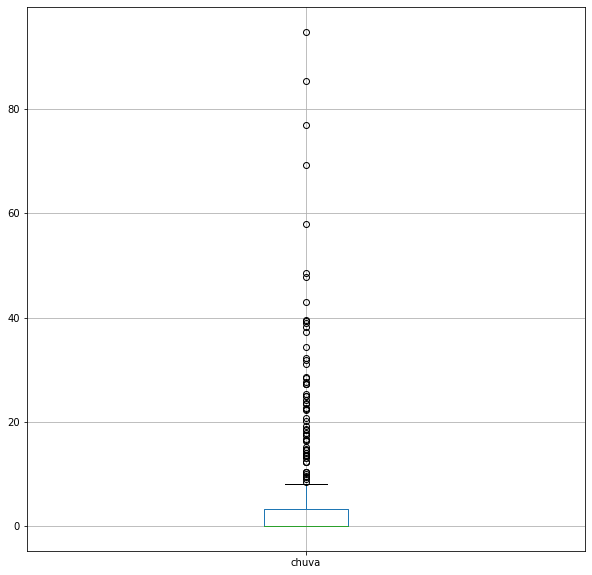

In [ ]:
dataset.boxplot('chuva')

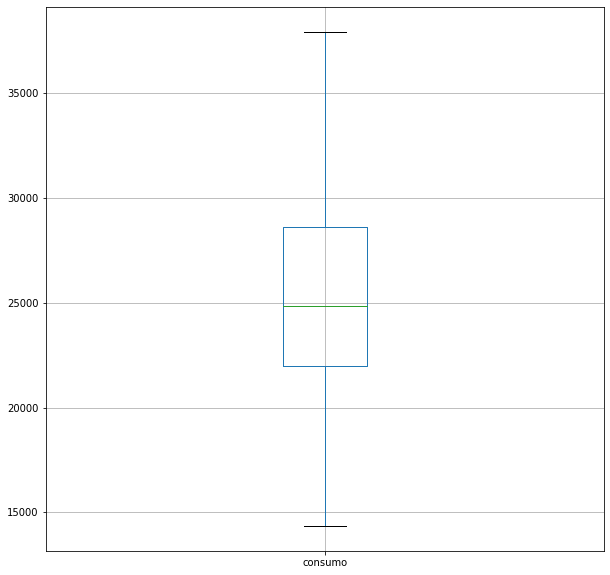

In [ ]:
dataset.boxplot('consumo')

## Matriz de correlação

Encontrando Correlações para seleção de variáveis para Regressão

In [ ]:
dataset.corr().round(2)


,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.00,0.86,0.92,0.02,-0.05,0.57
temp_min,0.86,1.00,0.67,0.10,-0.06,0.39
temp_max,0.92,0.67,1.00,-0.05,-0.04,0.64
chuva,0.02,0.10,-0.05,1.00,0.00,-0.19
fds,-0.05,-0.06,-0.04,0.00,1.00,0.51
consumo,0.57,0.39,0.64,-0.19,0.51,1.00


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

## Plotando a variável *dependente* (y)
https://pandas.pydata.org/pandas-docs/stable/visualization.html

In [ ]:
x, y = (28, 15)

Text(0.5, 0, 'Dias')

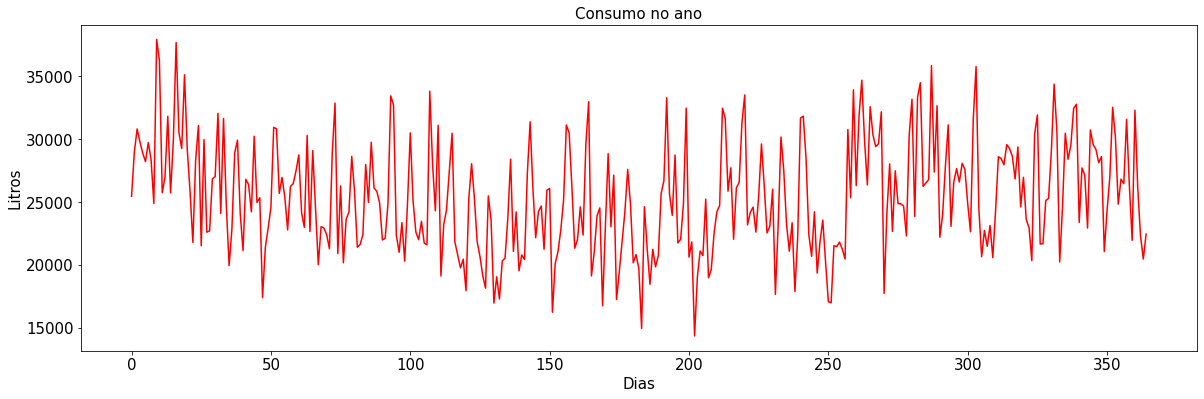

In [ ]:
ax = dataset['consumo'].plot(figsize = (20, 6), fontsize = 15, color = 'red')
ax.set_title('Consumo no ano', fontsize = 15)
ax.set_ylabel('Litros', fontsize = 15)
ax.set_xlabel('Dias', fontsize = 15)


# <font color='red' style='font-size: 30px;'>Box Plot</font>
<hr style='border: 2px solid red;'>

*italicized text*<img width='700px' src='../Dados/img/Box-Plot.png'>

## Importando biblioteca seaborn


In [ ]:
import seaborn as sns

## Box plot da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

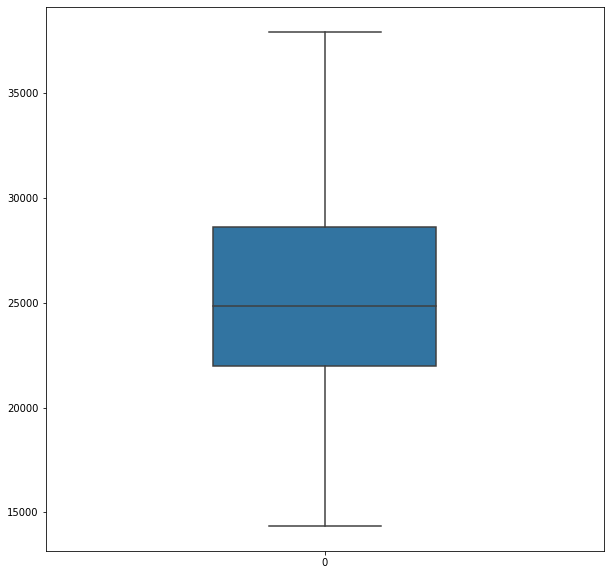

In [ ]:
sns.boxplot(data = dataset['consumo'], width = 0.4)

# <font color='red' style='font-size: 30px;'>Box Plot com Duas Variáveis</font>
<hr style='border: 2px solid red;'>

## Investigando a variável *dependente* (y) segundo determinada característica

Text(0.5, 0, 'Final de Semana')

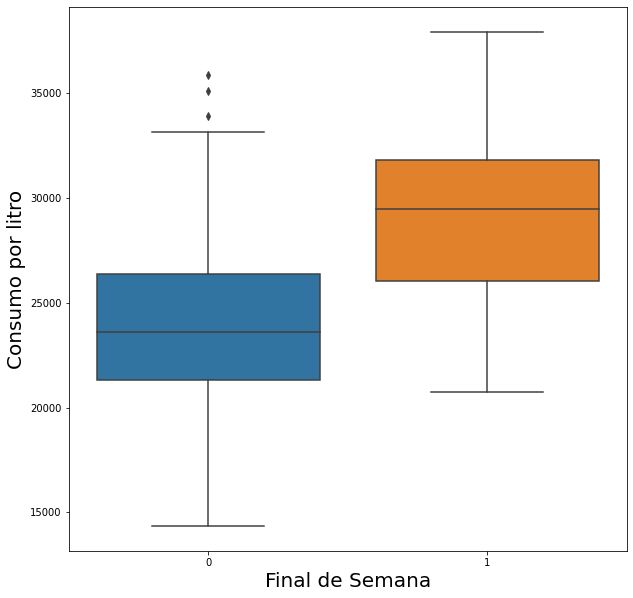

In [ ]:
ax = sns.boxplot(y = 'consumo', x = 'fds', data = dataset)
ax.set_ylabel('Consumo por litro', fontsize = 20)
ax.set_xlabel('Final de Semana', fontsize = 20)

## Configurações de estilo e cor da biblioteca *seaborn*

### Controle de estilo

> ####  API
> https://seaborn.pydata.org/api.html#style-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial

### Paleta de cores

> #### API
> https://seaborn.pydata.org/api.html#palette-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

In [ ]:
sns.dark_palette('blue')

[(0.14289171628325356, 0.14289583210240445, 0.19919851992384108),
 (0.11431337302660285, 0.11431666568192356, 0.3593588159390729),
 (0.08573502976995213, 0.08573749926144267, 0.5195191119543047),
 (0.05715668651330143, 0.05715833284096178, 0.6796794079695364),
 (0.028578343256650707, 0.02857916642048089, 0.8398397039847683),
 (0.0, 0.0, 1.0)]

In [ ]:
sns.set_style('whitegrid')

Text(0.5, 0, 'Final de Semana')

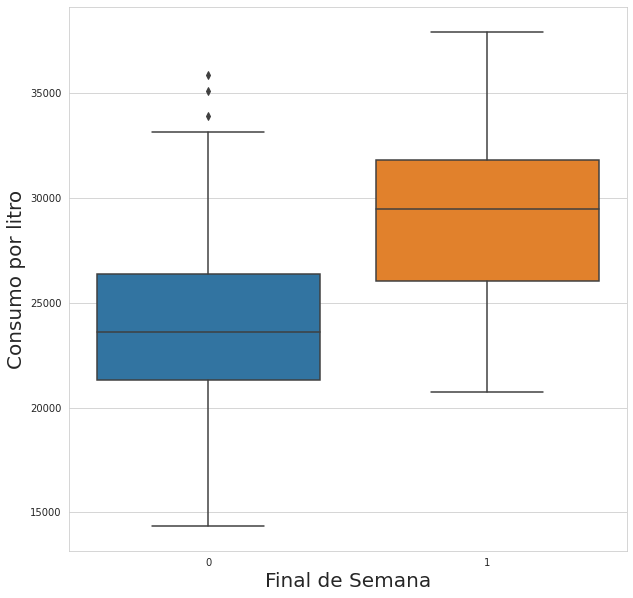

In [ ]:
ax = sns.boxplot(y = 'consumo', x = 'fds', data = dataset)
ax.set_ylabel('Consumo por litro', fontsize = 20)
ax.set_xlabel('Final de Semana', fontsize = 20)

# <font color='red' style='font-size: 30px;'>Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '  ')

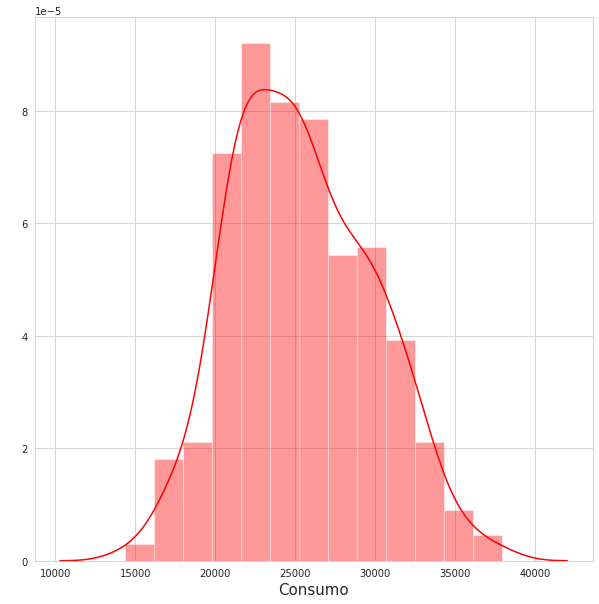

In [ ]:
histograma = sns.distplot(dataset['consumo'], color = 'red')
histograma.set_xlabel('Consumo', fontsize = 15)
histograma.set_ylabel('  ')

In [ ]:
selecao = dataset['consumo'] <= 35000 # exemplo de fatiamento nos dados

In [ ]:
dataset_new = dataset[selecao] # exemplo de fatiamento nos dados

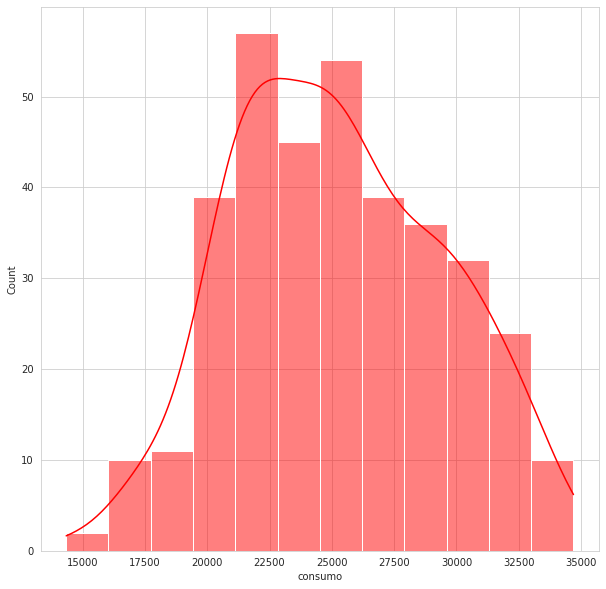

In [ ]:
sns.histplot(data = dataset_new, x = 'consumo', kde = True, color = 'red')  # exemplo de fatiamento nos dados

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (pairplot)</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plotando o relacionamento entre pares de variáveis em um dataset.</p>

In [ ]:
dataset.corr().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.00,0.86,0.92,0.02,-0.05,0.57
temp_min,0.86,1.00,0.67,0.10,-0.06,0.39
temp_max,0.92,0.67,1.00,-0.05,-0.04,0.64
chuva,0.02,0.10,-0.05,1.00,0.00,-0.19
fds,-0.05,-0.06,-0.04,0.00,1.00,0.51
consumo,0.57,0.39,0.64,-0.19,0.51,1.00


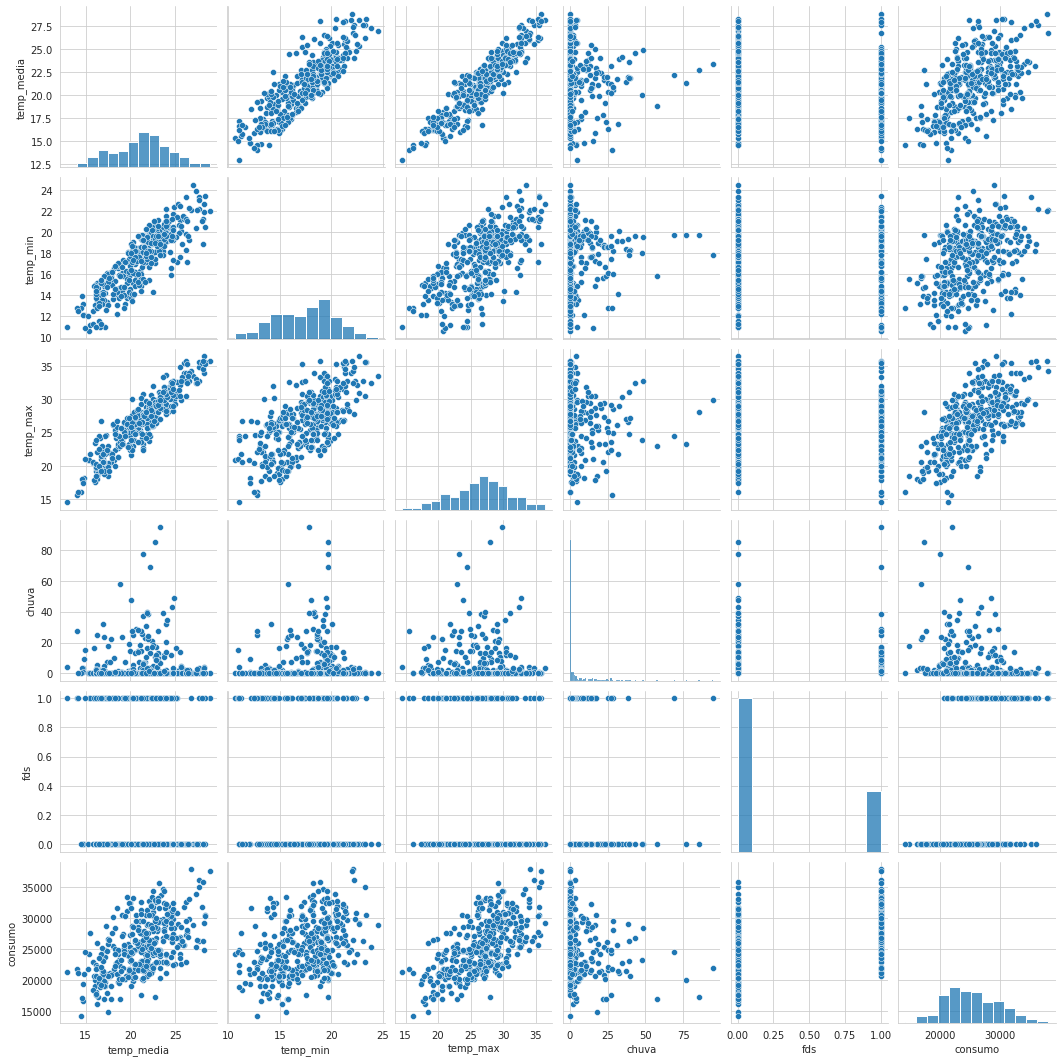

In [ ]:
sns.pairplot(dataset)

## Plotando o pairplot fixando somente uma variável no eixo y

Text(0.5, 1.1, 'Dispersão entre as variáveis de interesse')

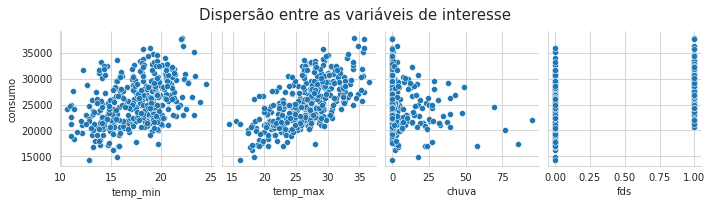

In [ ]:
ax = sns.pairplot(dataset, y_vars = 'consumo', x_vars = ['temp_min', 'temp_max', 'chuva', 'fds'])
ax.fig.suptitle('Dispersão entre as variáveis de interesse', fontsize = 15, y = 1.10)

Text(0.5, 1.1, 'Dispersão entre as variáveis de interesse')

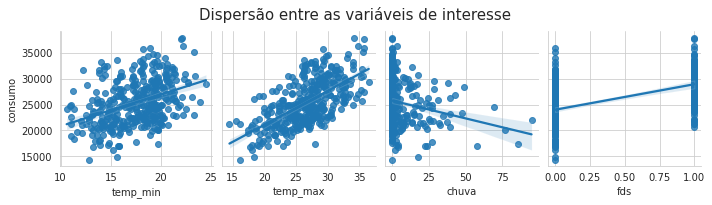

In [ ]:
ax = sns.pairplot(dataset, y_vars = 'consumo', x_vars = ['temp_min', 'temp_max', 'chuva', 'fds'], kind = 'reg')
ax.fig.suptitle('Dispersão entre as variáveis de interesse', fontsize = 15, y = 1.10)

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (jointplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.jointplot

https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plotando o relacionamento entre duas variáveis e suas respectivas distribuições de frequência.</p>

Text(0.5, 1.1, 'Dispersão - Consumo X Temperatura')

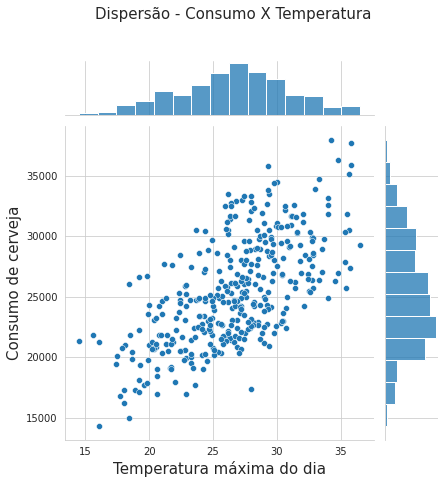

In [ ]:
ax = sns.jointplot(x = 'temp_max', y = 'consumo', data =dataset)
ax.set_axis_labels('Temperatura máxima do dia', 'Consumo de cerveja' , fontsize = 15)
ax.fig.suptitle('Dispersão - Consumo X Temperatura', fontsize = 15, y = 1.10)

## Plotando um jointplot com a reta de regressão estimada

Text(0.5, 1.1, 'Dispersão - Consumo X Temperatura')

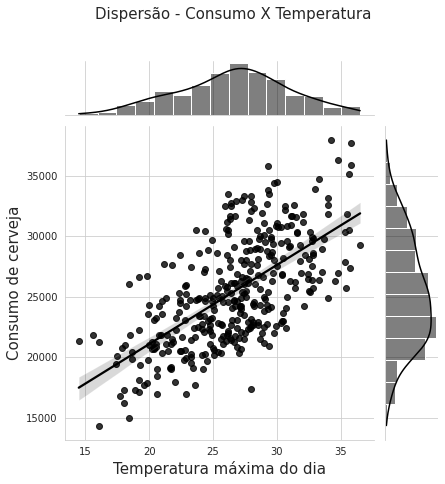

In [ ]:
ax = sns.jointplot(x = 'temp_max', y = 'consumo', data =dataset, kind = 'reg', color = 'black')
ax.set_axis_labels('Temperatura máxima do dia', 'Consumo de cerveja' , fontsize = 15)
ax.fig.suptitle('Dispersão - Consumo X Temperatura', fontsize = 15, y = 1.10)

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (lmplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.lmplot

https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plotando a reta de regressão entre duas variáveis juntamente com a dispersão entre elas.</p>

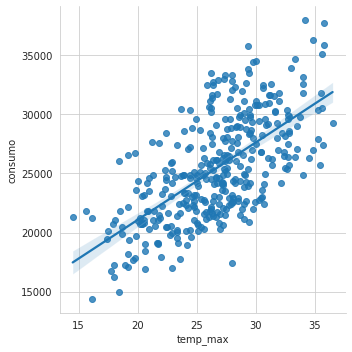

In [ ]:
sns.lmplot(x = 'temp_max', y = 'consumo', data = dataset)

## Plotando um lmplot utilizando uma terceira variável na análise (tipo I)

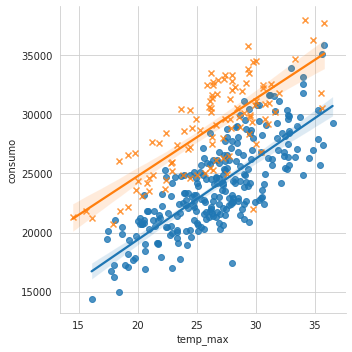

In [ ]:
sns.lmplot(x = 'temp_max', y = 'consumo', data = dataset, hue = 'fds', markers = ['o', 'x'], legend = False)


## Plotando um lmplot utilizando uma terceira variável na análise (tipo II)

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para o Consumo</font>
<hr style='border: 2px solid red;'>

# Regresão Linear
<hr>

## scikit-learn (https://scikit-learn.org/stable/)




## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Consumo de Cerveja (y)

In [ ]:
y = dataset['consumo']

In [ ]:
y.head(10)

0    25461
1    28972
2    30814
3    29799
4    28900
5    28218
6    29732
7    28397
8    24886
9    37937
Name: consumo, dtype: int64

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [ ]:
x = dataset[[ 'temp_max', 'chuva', 'fds']]

In [ ]:
x.head(10)

,temp_max,chuva,fds
0,32.5,0.0,0
1,33.5,0.0,0
2,29.9,0.0,1
3,28.6,1.2,1
4,28.3,0.0,0
5,30.5,12.2,0
6,33.7,0.0,0
7,32.8,48.6,0
8,34.0,4.4,0
9,34.2,0.0,1


## Criando os datasets de treino e de teste

In [ ]:
from pandas.core.common import random_state
X_train, X_test, Y_train, Y_test =  train_test_split(x, y, test_size = 0.30, random_state = 2811)

## Verificando os tamanhos dos arquivos gerados pela função *train_test_split*

In [ ]:
X_train.shape

(255, 3)

In [ ]:
X_test.shape

(110, 3)

<img width='600px' src='../Dados/img/reg_01.jpg'>

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [ ]:
from sklearn.linear_model import LinearRegression


## Instanciando a classe *LinearRegression()*

In [ ]:
modelo = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [ ]:
modelo.fit(X_train, Y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²



In [ ]:
print('R² = {}'.format(modelo.score(X_train, Y_train).round(2)))

R² = 0.73


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [ ]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [ ]:
print('R² = {}'.format(modelo.score(X_test, Y_test).round(2)))

R² = 0.69


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [ ]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


## Gerando previsão pontual

In [ ]:
modelo.predict(entrada)[0].round(2)

26094.9

## Criando um simulador simples

In [ ]:
temp_max = 40
chuva = 0
fds = 1
entrada = [[temp_max,chuva,fds]]
print('{} litros'.format(modelo.predict(entrada)[0].round(2)))

38742.53 litros


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


# <font color='red' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

<img width='600px' src='../Dados/img/reg_02.jpg'>

## Obtendo o intercepto do modelo



In [ ]:
modelo.intercept_.round(2)

5951.98

In [ ]:
type(modelo.intercept_)

numpy.float64

## Obtendo os coeficientes de regressão



In [ ]:
x.head(1)

,temp_max,chuva,fds
0,32.5,0.0,0


In [ ]:
modelo.coef_.round(2)

array([ 684.74,  -60.78, 5401.08])

In [ ]:
type(modelo.coef_)

numpy.ndarray

## Confirmando a ordem das variáveis explicativas no DataFrame

In [ ]:
x.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [ ]:
index = ['Intercepto', 'Temperatura Máxima', 'Chuva (mm)', 'Final de Semana']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [ ]:
pd.DataFrame(data = np.append(modelo.intercept_.round(2), modelo.coef_.round(2)), index = index, columns = ['Parâmentros'])

,Parâmentros
Intercepto,5951.98
Temperatura Máxima,684.74
Chuva (mm),-60.78
Final de Semana,5401.08


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros</b>.
</p>

# <font color='red' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [ ]:
Y_previsto_Y_train = modelo.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

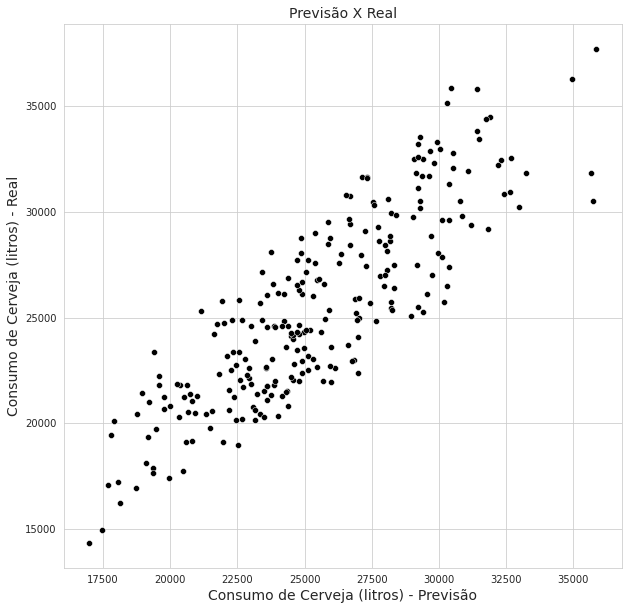

In [ ]:
ax = sns.scatterplot(x = Y_previsto_Y_train, y = Y_train, color = 'black')
ax.set_title('Previsão X Real', fontsize = 14)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize = 14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize = 14)
ax

## Obtendo os resíduos

In [ ]:
residuo = Y_train - Y_previsto_Y_train

## Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

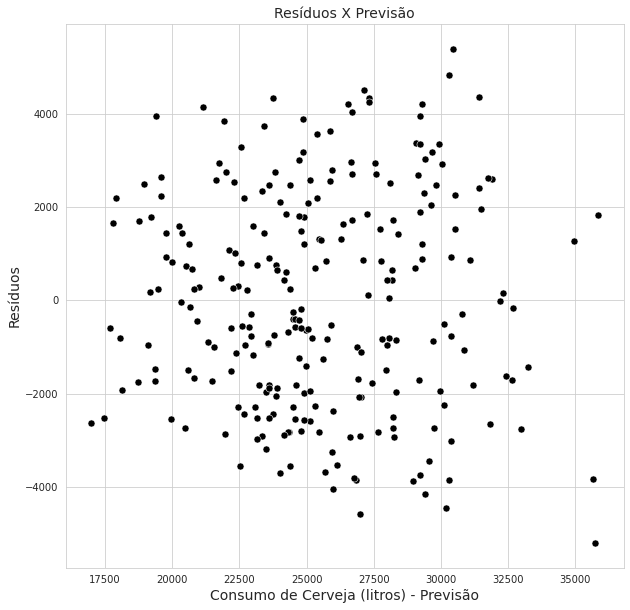

In [ ]:
ax = sns.scatterplot(x = Y_previsto_Y_train, y = residuo, color = 'black', s = 50)
ax.set_title('Resíduos X Previsão', fontsize = 14)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize = 14)
ax.set_ylabel('Resíduos', fontsize = 14)
ax

## Utilizando os resíduos ao quadrado

<img width='800px' src='../Dados/img/var_u.jpg'>
Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

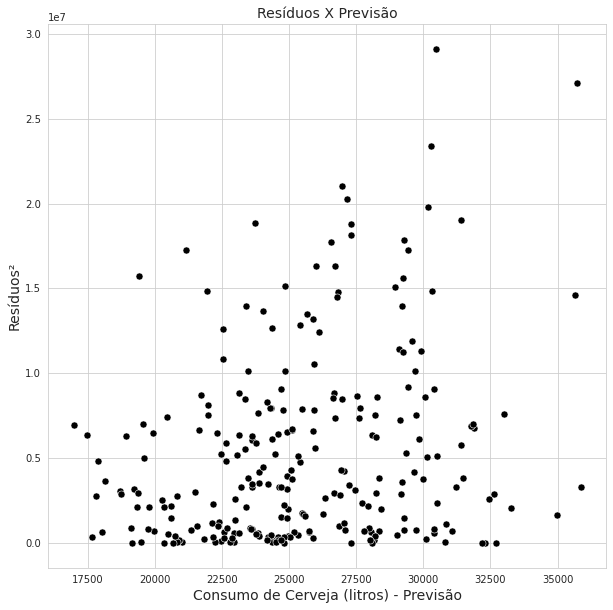

In [ ]:
ax = sns.scatterplot(x = Y_previsto_Y_train, y = residuo**2, color = 'black', s = 50)
ax.set_title('Resíduos X Previsão', fontsize = 14)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize = 14)
ax.set_ylabel('Resíduos²', fontsize = 14)
ax

## Plotando a distribuição de frequências dos resíduos

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'litros')

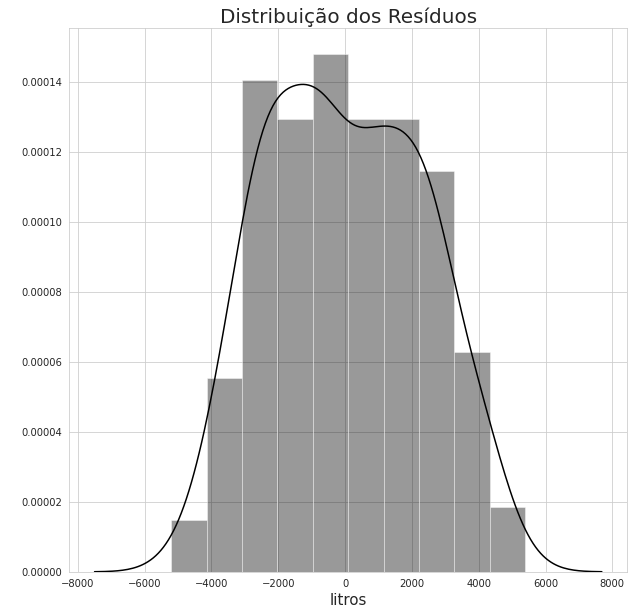

In [ ]:
ax = sns.distplot(residuo, color = 'black')
ax.set_title('Distribuição dos Resíduos', fontsize = 20)
ax.set_ylabel(' ')
ax.set_xlabel('litros', fontsize = 15)

# <font color='red' style='font-size: 30px;'>Comparando Modelos</font>
<hr style='border: 2px solid red;'>

## Estimando um novo modelo com a substituição da variável explicativa Temperatura Máxima pela Temperatuda Média

In [ ]:
x2 = dataset[['temp_media', 'chuva', 'fds' ]]

## Criando os datasets de treino e de teste

In [ ]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(x2, y, test_size = 0.3, random_state = 2811)

## Instanciando a classe *LinearRegression()*

In [ ]:
modelo2 = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo_2" para estimar nosso modelo linear utilizando os dados de TREINO (y2_train e X2_train)

In [ ]:
modelo2.fit(X2_train, Y2_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [ ]:
print('Modelo com Temp. Média')
print('R² = {}'.format(modelo2.score(X2_train, Y2_train).round(2)))

Modelo com Temp. Média
R² = 0.66


In [ ]:
print('Modelo com Temp. Máxima')
print('R² = {}'.format(modelo.score(X_train, Y_train).round(2)))

Modelo com Temp. Máxima
R² = 0.73


## Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [ ]:
Y_previsto = modelo.predict(X_test)
Y_previsto2 = modelo2.predict(X2_test)

## Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [ ]:
print('Modelo com temp.Média')
print('R² = {}'.format(modelo2.score(Y2_test, Y_previsto2).round(2)))

# <font color='red' style='font-size: 30px;'>Outras Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



## Obtendo métricas para o modelo com Temperatura Média

## Obtendo métricas para o modelo com Temperatura Máxima

# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

## Gerando previsão pontual

## Criando um simulador simples

## Salvando o modelo estimado

## pickle (https://docs.python.org/3/library/pickle.html)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O módulo <b>pickle</b> implementa protocolos binários para serializar e desserializar a estrutura de um objeto Python.</p>

In [ ]:
import pickle

In [ ]:
output = open('modelo_consumo_cerveja', 'wb')
pickle.dump(modelo,output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_consumo_cerveja','rb')
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
26094.90 litros
```